In [1]:
#######################################################################
# Copyright (C)                                                       #
# 2016-2018 Shangtong Zhang(zhangshangtong.cpp@gmail.com)             #
# 2016 Kenta Shimada(hyperkentakun@gmail.com)                         #
# Permission given to modify the code as long as you keep this        #
# declaration at the top                                              #
#######################################################################

"""
2019 Qihong Lu (qlu@princeton.edu)
this script is ...
- made for NEU|PSY 330 spring 2019 at princeton
- modified based on:
https://github.com/ShangtongZhang/reinforcement-learning-an-introduction/blob/master/chapter06/random_walk.py
"""

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='white', context='talk', rc={"lines.linewidth": 2})

# define the number of states
n_states = 6
# define the reward
R = np.zeros(n_states)
# the last state has the reward
R[-1] = 1

In [2]:
def run_agent(V, alpha=0.1):
    """let the model traverse through all states, and perform TD update

    Parameters
    ----------
    V : 1d array
        estimated values for all states
    alpha : float
        the learning rate

    Returns
    -------
    1d array
        updated values

    """
    # initial state
    state = 0
    while True:
        old_state = state
        # move to the right
        state += 1
        # TD update
        V[old_state] += alpha * (R[state] + V[state] - V[old_state])
        if state == n_states-1:
            break
    return V

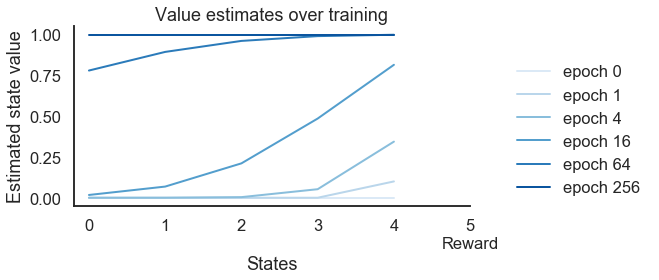

In [3]:
# plot the results
f, ax = plt.subplots(1, 1, figsize=(7, 4))

episodes_to_plot = [0] + [2**k for k in np.arange(0, 10, 2)]
col_pal = sns.color_palette('Blues', n_colors=len(episodes_to_plot))
current_values = np.zeros(n_states)
j = 0
for i in range(episodes_to_plot[-1] + 1):
    if i in episodes_to_plot:
        ax.plot(
            range(n_states-1), current_values[:-1],
            label=f'epoch {i}', color=col_pal[j])
        j += 1
    run_agent(current_values)


ax.set_xlabel('States')
ax.set_xticks(range(n_states))
xticklabels = [i for i in range(n_states)]
xticklabels[-1] = f'{n_states-1}\nReward'
ax.set_xticklabels(xticklabels)
ax.set_title('Value estimates over training')
ax.set_ylabel('Estimated state value')
f.legend(frameon=False, bbox_to_anchor=(1.3, .8))
f.tight_layout()
sns.despine()
